# <center>Воспроизводимость и контейнеризация приложений
## <center>Воспроизводимость
Код, разрабатываемый дата-сайентистом, должен быть воспроизводимым в постоянно меняющихся в условиях:
* меняются данные, поступающие на вход;
* трансформируются пайплайны предобработки данных;
* постоянно изменяются гиперпараметры алгоритмов;
* иногда модифицируются или вовсе удаляются алгоритмы популярных библиотек.

В идеале ожидается, что выполнение кода должно приводить к одинаковым результатам в различных условиях.

**Воспроизводимость результатов** является одним из главных показателей качества модели. Именно поэтому обеспечение воспроизводимости — одна из важнейших проблем в современном ML-инжиниринге.

Мы можем доверять результату, полученному с помощью модели, только когда доподлинно известно, на какой выборке и с каким пайплайном предобработки она была построена. Кроме того, ожидается, что результаты будут консистентными (согласованными с исходными данными), так как необходимо однозначно понимать, какое изменение привело к улучшению или ухудшению результатов.

На схеме приведён классический пайплайн работы над моделью:

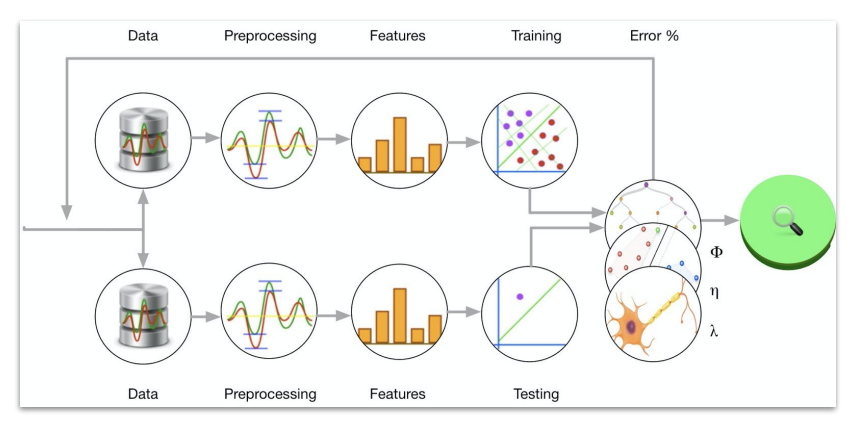

**ИНСТРУМЕНТЫ ОБЕСПЕЧЕНИЯ ВОСПРОИЗВОДИМОСТИ:**
* **Версионирование кода.**  
    Обычно весь пайплайн представлен в виде частей кода, для работы с которым используется знакомая нам распределённая система управления версиями Git в совокупности с хостингом GitHub.

* **Версионирование артефактов.**  
    В процессе работы над проектом появляются различные артефакты: датасеты, модели, файлы конфигурации и прочее. Для их версионирования обычно используются такие инструменты, как DVC и Sonatype Nexus.

* **Виртуализация и контейнеризация.**  
    Одним из важнейших аспектов воспроизводимости является настройка окружения.

    >**Виртуализация** — это технология изоляции, сохранения состояния и воспроизведения окружения. Благодаря ей вы можете воссоздать на другом компьютере точную копию вашего окружения и тем самым обеспечить воспроизводимость.

    Однако иногда воссоздания окружения недостаточно и необходимо обеспечить не только воспроизводимость версий библиотек, но и воспроизводимость среды выполнения программы — операционной системы, на которой реализован проект. Для этого прибегают к инструментам **контейнеризации**, таким как *Docker*.

* **Управление экспериментами.**  
    Для каждого запуска обучения необходимо фиксировать настройки гиперпараметров и сохранять их. В этом помогают системы управления экспериментами, например MLflow.




# <center>Виртуализация и изолированность. Virtualenv
Намного проще создать для каждого проекта виртуальную среду, изолированную от основной системы. Тогда каждый из проектов будет иметь свои **независимые настройки**, в том числе разные библиотеки и их версии.

Когда мы говорим про изолированность, мы имеем в виду, что приложение будет запускаться в своей отдельной среде и таким образом не зависеть от ОС и настроек системы, на которой мы его разворачиваем.

## <center>Virtualenv
Одним из наиболее популярных инструментов для создания изолированных сред в *Python* является *virtualenv*. Он обеспечивает работоспособность сервисов вне зависимости от того, какие они имеют зависимости.

Предварительно создайте в своей операционной системе папку с именем `project_a`. Эта папка будет имитировать папку проекта, и на её основе мы продемонстрируем работу виртуальных окружений. Перейдите в созданную папку в терминале (команда `cd /путь/до/папки`) или откройте её в вашей *IDE*.

Чтобы создать новую среду, необходимо набрать в терминале команду:

`python -m venv <название сервиса>`

После этого в вашей текущей директории появится папка проекта с именем, которое вы указали в команде `venv`.

Папка с настройками виртуальной среды будет иметь следующий вид (имена файлов могут незначительно отличаться в зависимости от версии Python, которую вы используете):

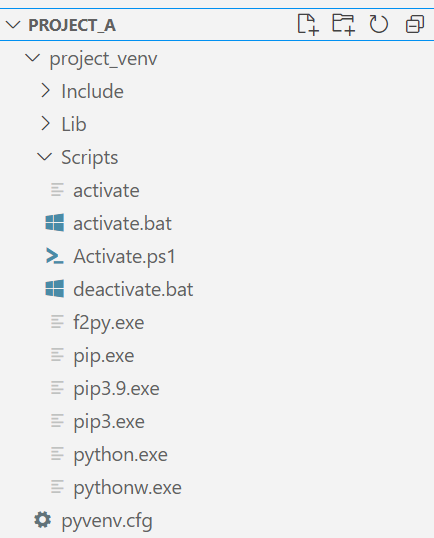

Директория *Scripts* — это аналог директории *bin* в *UNIX*-системах: в ней лежат файлы, которые взаимодействуют со средой, например файлы для активации и деактивации среды.

В папке *Lib* содержится копия *python* и все зависимости (библиотеки и их версии).

Чтобы активировать виртуальное окружение в *Windows*, необходимо в командной строке запустить файл *Activate.ps1*:

`project_a_venv/Scripts/Activate.ps1`

Если после выполнения описанных выше действий активация среды продолжает вызывать ошибку, ввести в терминале:

`Set-ExecutionPolicy -Scope CurrentUser Unrestricted`

Если команда выполнилась успешно, вы увидите, что перед приглашением в командной строке появилась дополнительная надпись, совпадающая с именем виртуального окружения. В результате выполнения команды мы увидим следующее:

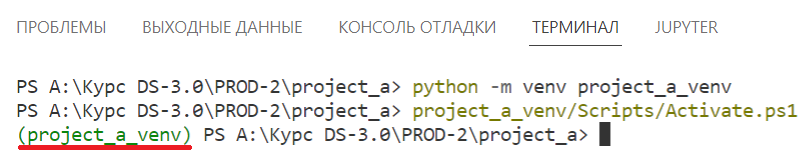

Выделенная красным строка говорит нам, что мы находимся в изолированном окружении *project_a_venv*.

Таким образом вы полностью изолируете окружение своего проекта и можете установить все необходимые для работы проекта версии пакетов — эти версии не будут отражены в глобальном окружении *Python* и будут зафиксированы только в активированном виртуальном окружении.

Например, выполним команду для установки библиотеки `scikit-learn`:

`(project_a_venv) $ pip install scikit-learn`

Чтобы выйти из виртуального окружения в область глобального окружения, необходимо ввести в терминале следующую команду:

`deactivate`

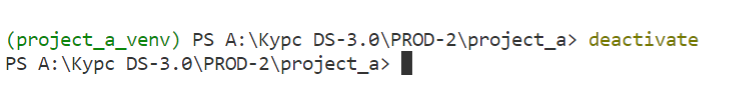

# <center>Virtualenv и  VS Code
Если вы разрабатываете свои программы в *IDE*, например в *VS Code*, то перемещаться между виртуальными окружениями становится совсем просто.

Давайте предварительно создадим в папке нашего проекта пустой `py`-файл, чтобы *VS Code* понял, что мы работаем с языком *Python*. Назовём этот файл `app.py`.

Чтобы переключиться между окружениями в *VS Code*, необходимо перейти в раздел выбора интерпретатора *Python* (правый нижний угол):

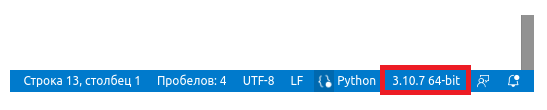

По умолчанию используется **глобальное окружение**. Нам нужно переключиться на только что созданное виртуальное окружение:

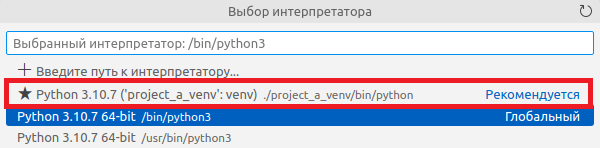

После этого необходимо перезапустить терминал (если он был открыт).

Результат будет тем же, что и после активации виртуального окружения через командную строку:

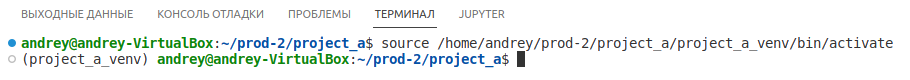

## <center>Изоляция зависимостей
Рядом с папкой `project_a` создайте ещё одну папку проекта и назовите её `project_b`. В этой папке также создайте пустой файл `app.py`.

Откройте два терминала: в первом перейдите в папку `project_a`, а во втором — в `project_b`. Также можно открыть эти папки в двух окнах `VS Code`.

В папке с проектом А создадим виртуальное окружение с именем `project_a_venv`, активируем его и установим `scikit-learn` (если вы не делали этого ранее):

```cmd
python -m venv project_a_venv
project_a_venv/Scripts/Activate.ps1
(project_a_venv)$ pip install -q scikit-learn
```

Ключ `-q` предназначен для установки без вывода справочной информации — «тихая» установка (от англ. *quiet* — тихий).

Затем создадим виртуальное окружение в папке `project_b` с именем `project_b_venv`, активируем его и установим пакет `pandas`.

```cmd
python -m venv project_b_venv
project_b_venv/Scripts/Activate.ps1
(project_b_venv)$ pip install -q pandas
```

Давайте посмотрим, какие библиотеки доступны внутри каждого из окружений. Для этого воспользуемся командой `pip freeze`, которая выводит список установленных пакетов с указанием номера их версии. Выполните в каждом из окружений команду:

Для проекта А мы увидим примерно следующую картину:

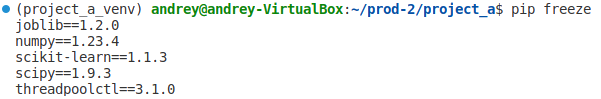

Для проекта B список будет выглядеть так:

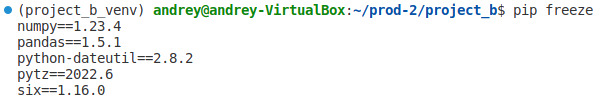

Что мы видим? Списки установленных пакетов отличаются: например, библиотеки `scikit-learn` нет в виртуальном окружении проекта B, а библиотеки `pandas` нет в виртуальном окружении проекта A. Списки пакетов для проектов А и B пересекаются только в одном — библиотеке `numpy`. Так происходит потому, что и `scikit-learn`, и `pandas` требуют для своей стандартной работы пакет numpy.

В глобальном окружении находится совершенно другой список зависимостей.

Только что мы посмотрели на пример **изоляции**: мы создали отдельные виртуальные окружения для каждого из проектов, зависимости которых изолированы друг от друга. Из приведённого примера становится интуитивно понятно, что виртуальные окружения существуют независимо от глобального и установка пакета в одно из них не означает, что пакет будет установлен в какое-то другое окружение, и наоборот.

Когда разработка проекта завершена и мы готовы загрузить его на свой *GitHub* и поделиться им с коллегами, мы можем сохранить все те версии библиотек, которые использовали при разработке, в файл. Для этого применяется всё та же команда `pip freeze`, только с указанием имени файла, в который необходимо произвести запись. Традиционно такой файл называют `requirements.txt` и располагают в корневой директории проекта. Для указания файла используется ключ `-r` или оператор `>`:

`(project_a_venv) $ pip freeze -r requirements.txt`  
или  
`(project_a_venv) $ pip freeze > requirements.txt`

Установить в него все необходимые зависимости, используя лишь одну команду:

`(имя_виртуального_окружения) $ pip install requirements.txt`

## <center>Как работает изоляция
Чтобы понять, как работает изоляция, давайте проверим, где располагаются исполняемые файлы *Python* в случае глобального и виртуального окружений.

Для начала посмотрим на глобальное окружение. С деактивированной средой запускаем команду:

`Get-Command python | Format-Table Source`

Данная команда выводит расположение скрипта, который выполняется при вызове команды `python`.

**ВИРТУАЛЬНОЕ ОКРУЖЕНИЕ ДЛЯ FLASK-ПРИЛОЖЕНИЯ**

В корневой директории проекта (у нас она называется `web`) создадим виртуальное окружение с именем `project_venv`.

`cd {path}/web`

`python -m venv project_venv`

`project_venv/Scripts/Activate.ps1`

Установим зависимости и запустим сервер:

`pip install flask requests scikit-learn`

`python ./server.py`

`python ./client.py`

Если всё работает корректно, GET- и POST-запросы отработали без ошибок, то мы можем зафиксировать версии наших зависимостей и поместить их в файл requirements.txt в корневой директории проекта:

`(project_venv) $ pip freeze > requirements.txt`


# <center>Контейнеризация. Docker и Docker Hub
>**Контейнеризация** — это метод виртуализации, при котором ядро операционной системы поддерживает несколько изолированных экземпляров приложений.

По сути, *Docker* — это программное обеспеспечение, которое позволяет в автоматическом режиме создавать виртуальные машины и управлять ими. При этом *Docker* делает это более элегантно по сравнению с обычными средствами виртуализации, например *VirtualBox*.

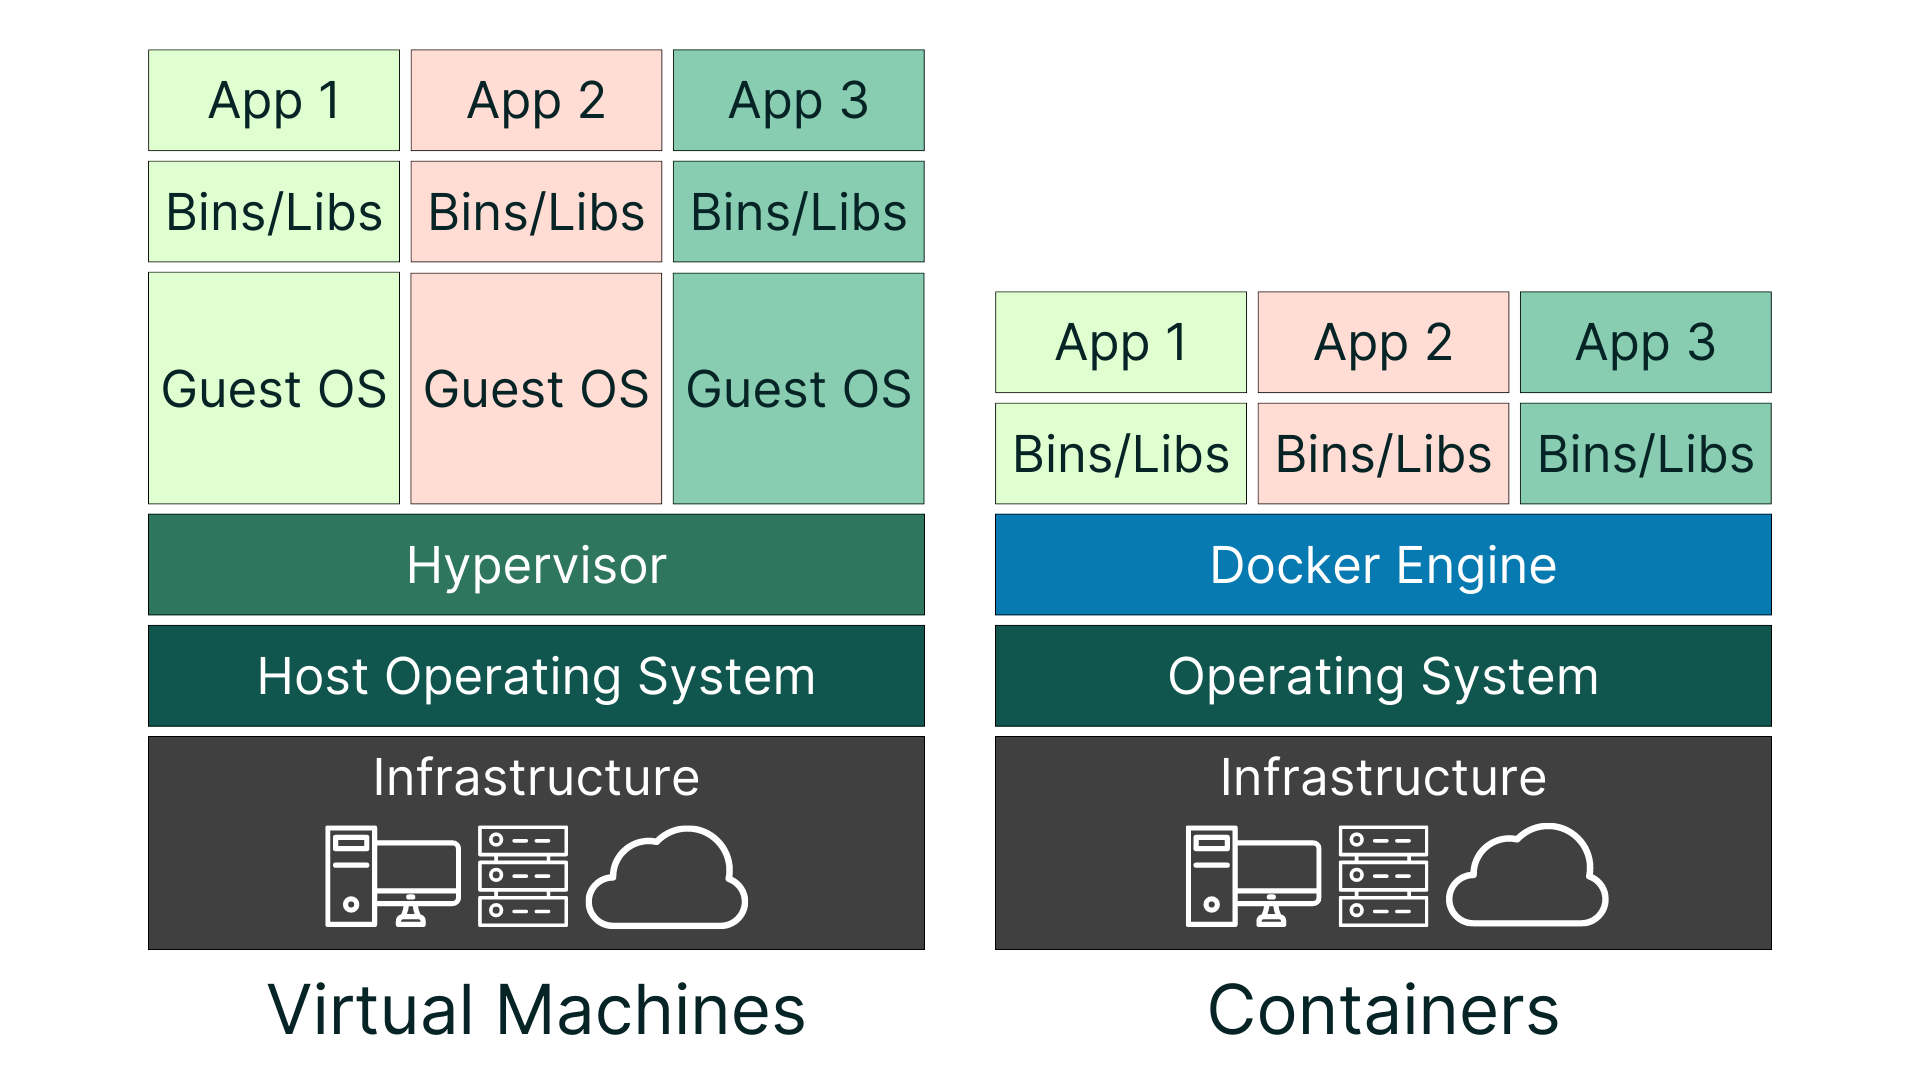

Докер позволяет собрать приложение со всем его окружением и зависимостями в **контейнер**. В нашем случае приложением может быть модель *ML*, предсказывающая стоимость авто, его зависимостями — библиотеки *sklearn*, *numpy* и *pandas*, а окружением — ОС, на которой работает приложение.

За счёт того что *Docker* потребляет не очень много ресурсов машины, на которой находится, можно запускать сразу несколько контейнеров даже на среднестатистическом компьютере. Из-за этого стало принято использовать **небольшие контейнеры** для каждого конкретного сервиса: например, если у нас есть Django-приложение с базой данных, то сам сервер будет находиться в одном контейнере, а база — в другом. Изоляция часто позволяет добиться улучшения производительности и упрощения миграции сервисов.

Таким образом, контейнеризация — это создание некоторого «ящика» для вашего приложения, в который будут сложены ядро, ОС, библиотеки, ПО и само приложение.

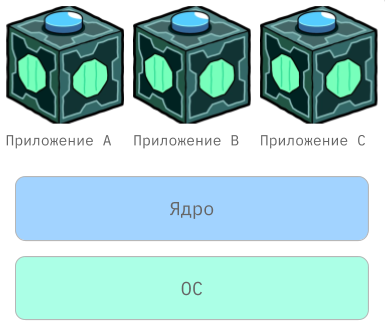

# <center>ОСНОВНЫЕ КОМПОНЕНТЫ DOCKER
>**Образы (images)** — это основные строительные блоки, на основании которых создаются контейнеры (а в них впоследствии упаковываются приложения).

Запуская на его основе контейнер, мы создаём исполняемый экземпляр, который инкапсулирует требуемое программное обеспечение.

Ключевую роль в устройстве образа играет идея о слоях.

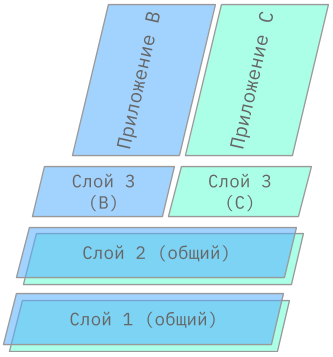

Готовые образы хранятся в Docker Registry. Они могут быть публичными или приватными: например, официальное публичное хранилище — это [Docker Hub](https://hub.docker.com/). Это аналог GitHub, но если последний используется для хранения кода и работы с Git, то Docker Hub используется для хранения docker-образов и работы с Docker.

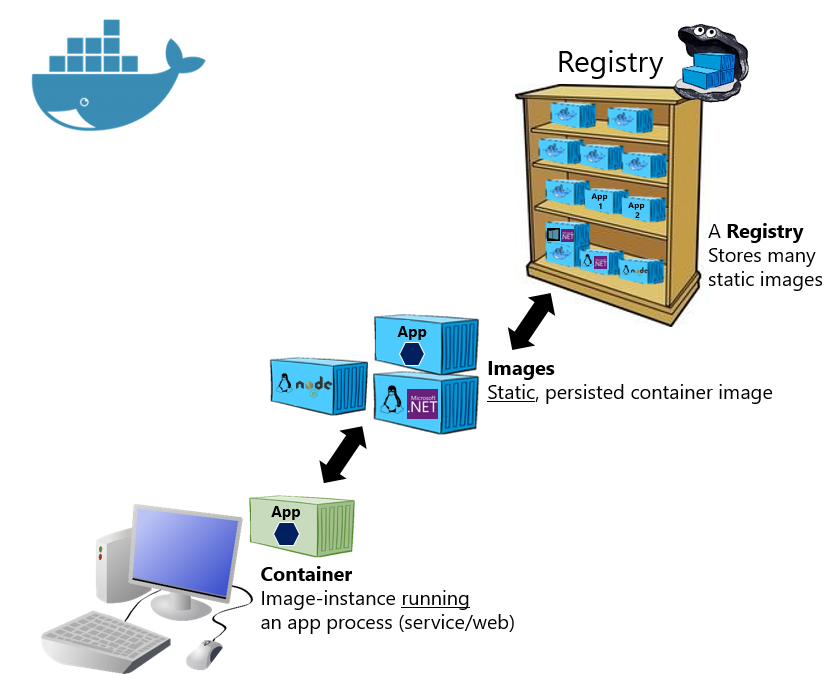

Основное преимущество Docker заключается в том, что с помощью Docker Registry мы можем делиться образами, а значит, легко переносить созданные нами приложения.

Для работы с Docker Registry достаточно знать две команды (они очень похожи на команды Git):
* `docker push` — отправить собранный образ в *Docker Registry*.
* `docker pull` — скачать готовый образ из *Docker Registry*.

Docker-образ управляется Daemon, который отвечает за все действия, связанные с контейнерами, и, конечно, самим клиентом для взаимодействия с ним.



# <center>Создание docker-образов. Dockerfile
>**Dockerfile** — это специальный файл, в котором содержатся инструкции по сборке контейнера (а точнее, его слоёв): какой тип контейнера и операционную систему использовать, какие дополнительные пакеты установить, какие команды запустить.

Типичный Dockerfile выглядит примерно так:

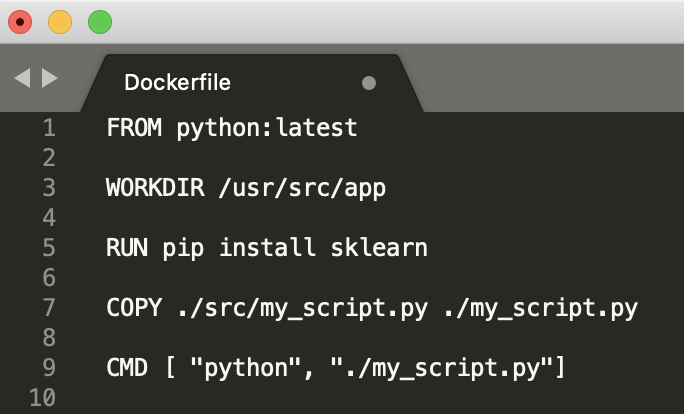

Мы хотим написать сервис, который создаёт две случайные подвыборки данных из нормальных распределений: первая выборка — с параметрами $\mu=0$ и $\sigma=1$ (параметры стандартного нормального распределения), вторая — с параметрами, которые ввёл пользователь.

Для каждой выборки должны строиться и сохраняться в файл `plot.png` графики плотности распределений. Все файлы с графиками будем помещать в папку `output`.

Мы хотим запускать это приложение в контейнере и обеспечивать его работу на любом компьютере.

После окончания работы наш проект будет содержать:
* само приложение `plot.py`;
* папку `output`, в которой будут храниться результаты работы;
* приложения, то есть графики плотности распределений в формате *PNG*;
* `Dockerfile` — описание контейнера, чтобы обеспечить работу приложения на любом компьютере;
* файл `requirements.txt` — зависимости приложения (библиотеки, которые мы используем).

**ШАГ 1. ПИШЕМ ПРИЛОЖЕНИЕ**

Начнём с написания самого приложения. Пусть сначала исходный код в файле `plot.py` и папка `output` будут находиться в корневой директории `my_first_container`:

```
my_first_container    ├─src
       └─output
       └─plot.py
```

**ШАГ 2. СОЗДАЁМ DOCKER-ОБРАЗ**
Наше мини-приложение работает. Теперь мы можем завернуть его в контейнер, поэтому следующим шагом будет создание образа контейнера. Для этого создайте (если вы этого ещё не сделали) файл Dockerfile (без расширения) в корне папки, в которой лежит ваше приложение.

Традиционно код самого приложения помещают в папку `src` (от англ. source — источник), а Dockerfile и файл с зависимостями `requirements.txt` (о последнем мы поговорим далее) располагают рядом с этой папкой в корневой директории проекта. Тогда директория нашего проекта будет выглядеть следующим образом:

```
my_first_container
      ├─src
          └─output
          └─plot.py
      └─Dockerfile
```

Переходим к описанию нашего контейнера. Первое, что нужно **обязательно** указать в нашем новом *Dockerfile*, — какой образ мы берём за основу. Базовый образ будет задавать файловую систему контейнера и многие другие его составные конфигурации.

Для указания базового образа, на основе которого будет собираться контейнер, используется ключевое слово FROM. Итак, вот первая строка нашего Dockerfile:

`FROM python:3.9`

`python:latest` означает использование последней доступной версии.

В описании образа можно ознакомиться с информацией о том, какие бывают сборки и версии. Например, существуют обычная сборка `python:<version>` и сборка `python:<version>-alpine`, созданная на базе *Alpine Linux*. Последняя весит намного меньше, чем большинство базовых образов дистрибутива (~ 5 МБ). Кроме того, есть сборка `python:<version>-slim`, которая содержит только минимальные пакеты, необходимые для запуска *Python*, и не включает в себя стандартные пакеты.

Теперь укажем путь к рабочей папке нашего приложения внутри *docker*-контейнера (вместо `/usr/src/app` вы можете прописать любой путь, по которому хотите поместить файлы внутри контейнера). Для этого используется ключевое слово `WORKDIR`.

`WORKDIR /usr/src/app`

Так как образ *python*, который мы используем в качестве базового, собран на основе *Linux*, то и файловая система контейнера будет, как в *ОС Linux*. Ключевое слово `WORKDIR` говорит контейнеру, какой каталог будет использоваться при его запуске.

Далее скопируем в рабочую директорию файлы из корня нашего приложения. Для этого используется ключевое слово `COPY`. В качестве **первого аргумента** этой директивы указываются папки или файлы, которые мы хотим скопировать с **локальной машины**, в качестве **второго аргумента** — куда мы хотим поместить эти копии **в контейнере**.

`COPY ./src/ ./`

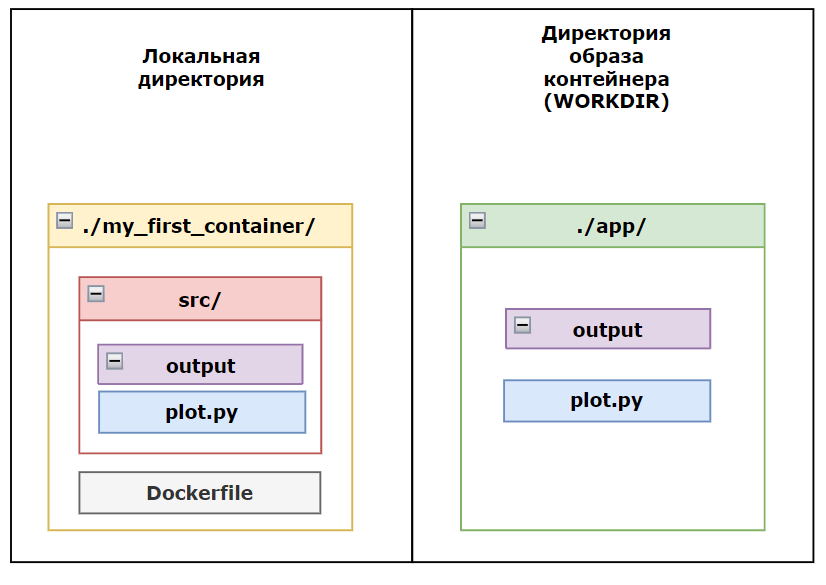

Наконец, напишем команду для запуска скрипта, который будет выполняться вместе с запуском контейнера. Для этого используется директива `CMD` (от англ. *command* — команда):

`CMD [ "python", "./plot.py" ]`

Теперь откроем терминал, перейдём в папку с нашим приложением и запустим команду для сборки контейнера (`docker build`):

`docker build -t my_first_image .`

Разберём команду на составляющие:
* `build` сообщает docker, что мы хотим создать образ;

* ключ `-t` указывает на название образа;

* `.` в конце означает, что `Dockerfile` нужно искать именно в корне. Так как мы запускаем команду из директории `my_first_containter/`, а в ней находится `Dockerfile`, то Docker автоматически найдёт его. Если ваш `Dockerfile` находится в директории, отличной от той, в которой вы запускаете команду `docker build`, то вместо `.` вам необходимо будет указать путь до него.

Чтобы убедиться, что образ собран, а также посмотреть список доступных образов, можно использовать команду:

`docker images`

Команда `docker images` выводит список собранных образов в виде таблицы со следующими столбцами: `REPOSITORY` (имя образа), `TAG` (тег образа, в котором обычно указывается его версия), `IMAGE ID` (идентификатор образа, по которому его можно однозначно найти, — у вас он может отличаться), `CREATED` (как давно образ был собран), `SIZE` (размер образа).

Так как образы занимают место в памяти компьютера, неактуальные образы можно удалять с помощью команды `docker rmi` (от англ. remove image):

`docker rmi <image_id>`

где `image_id` — идентификатор образа (столбец `IMAGE_ID`).

**ШАГ 3. ЗАПУСКАЕМ DOCKER-КОНТЕЙНЕР**
Попробуем запустить контейнер на основе нашего образа — для этого используется команда `docker run <имя образа>`:

`docker run -it --rm --name=my_first_container my_first_image`

Расшифруем ключи и аргументы этой команды:
* `-it` объединяет команды: `-i` оставляет строку для ввода, а `-t` выделяет терминал;
* параметр `--rm` автоматически удаляет контейнер после завершения его работы (в том числе при завершении с ошибкой) — это позволяет не хранить неактивные контейнеры;
* параметр `--name` назначает *docker*-контейнеру имя (мы задали имя `my_first_container`).

После запуска мы увидим ошибку Python:

```
Traceback (most recent call last):
  File "./plot.py", line 4, in <module>
    import seaborn as sns
ModuleNotFoundError: No module named 'seaborn'
```

**ШАГ 4. ДОБАВЛЯЕМ БИБЛИОТЕКИ В КОНТЕЙНЕР**
Для этого создадим файл `requirements.txt` рядом с `Dockerfile`. Укажем в нём необходимые библиотеки и их версии:

```
my_first_container
      ├─src
          └─output
          └─plot.py
      └─Dockerfile
      └─requirements.txt
```

Теперь необходимо переместить файл с зависимостями в наш контейнер, а после запустить команду для установки зависимостей.

Для этого напишем перед командой `CMD`, запускающей выполнение скрипта в `Dockerfile`, строки:

`COPY ./requirements.txt ./`  
`RUN pip install --no-cache-dir -r requirements.txt`

Директива `COPY` нам уже знакома: она позволяет копировать файлы из локальной директории в файловую систему контейнера.

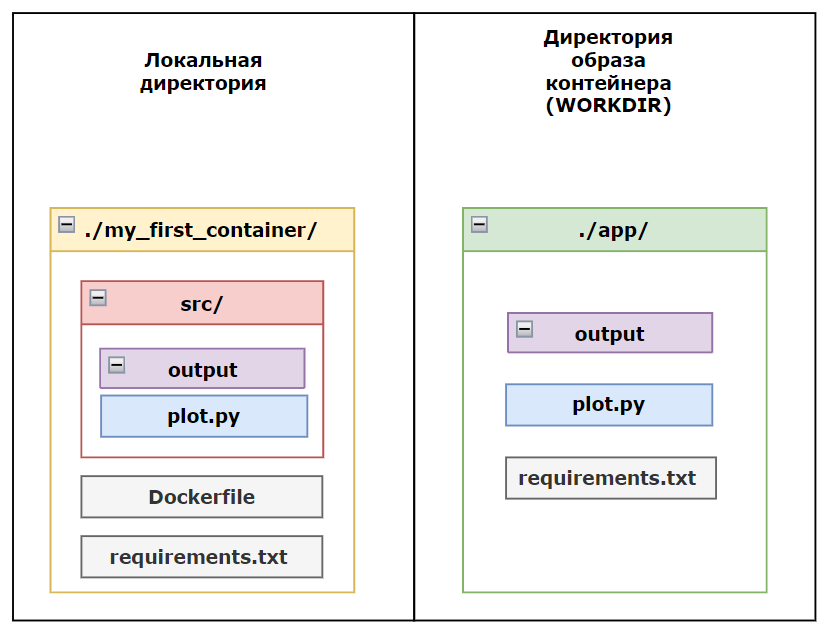

Директива `RUN` позволяет запускать любые команды по аналогии с терминалом. Например, поскольку мы работаем на основе базового образа *Python*, мы можем воспользоваться менеджером пакетов `pip` для установки зависимостей.

Также для команды `pip install` мы указываем:
* параметр `--no-cache-dir` — позволяет не использовать кэш, а скачать пакеты заново. Вы можете не указывать этот параметр, если уверены, что в дальнейшем версии используемых библиотек не изменятся.
* ключ `-r` — указывает на файлы с зависимостями.

Теперь нам необходимо заново собрать образ

`docker build -t my_first_image .`

После этого можно запустить контейнер на основе этого образа:

`docker run -it --rm --name=my_first_container my_first_image`

Для того чтобы посмотреть список запущенных контейнеров, можно воспользоваться командой `docker ps`. По умолчанию она выводит список активных контейнеров. Для вывода списка всех контейнеров используйте ключ `-a`, но предварительно перезапустите контейнер без ключа `--rm`, так как данный ключ удаляет контейнеры.

Она выводит на экран информацию о контейнерах в виде таблицы со следующими столбцами:
* `CONTAINER ID` — идентификатор контейнера;
* `IMAGE` — имя образа, на основе которого запущен контейнер;
* `COMMAND` — команда, используемая внутри контейнера (то, что мы прописали в директиве CMD в Dockerfile);
* `CREATED` — когда был запущен контейнер;
* `STATUS` — статус контейнера;
* `PORTS` — порты, которые использует контейнер (о них поговорим в следующем юните — сейчас наше приложение не использует веб-интерфейс, и портов у него не будет);
* `NAMES` — имя контейнера.

Однако файл `plot.png` в папке `output` не обновился с выполнением скрипта в контейнере. Куда же он тогда «успешно сохранён»?



**ШАГ 5. СИНХРОНИЗАЦИЯ ПУТЕЙ, ИЛИ КУДА ПРОПАЛ `PLOT.PNG`**
Технически файл `plot.png` удалился вместе с контейнером после того, как запустился и выполнился скрипт `plot.py`. *Docker* не сохраняет файлы внутри контейнера, так как внутри контейнера своя отдельная файловая система.

Что же делать? Ответ очень прост — нам нужно связать контейнер с локальной файловой системой на нашем компьютере.

Для этого укажем параметр `--volume` или ключ `-v` в команде `docker run`.

Ключ `-v` требует указания путей, которые записываются в формате `<путь на локальной машине>:<путь в контейнере>`:

`docker run -it --rm -v $PWD/src/output/:/usr/src/app/output  --name=my_first_container my_first_image`

**ШАГ 6. ЗАГРУЖАЕМ ОБРАЗ НА DOCKER HUB**
Принцип загрузки образа в *Docker Hub* очень схож с загрузкой кода на *GitHub*:
* создаем локальный образ контейнера;
* делаем *push* образа на *Docker Hub*.

Пользователь со своей стороны может:
* сделать *pull* нашего образа;
* запустить образ контейнера на своей локальной машине.

Рассмотрим механизм загрузки образов в Docker Hub по шагам.

1. Первым делом зарегистрируйтесь на Docker Hub, если не сделали этого ранее.

    `docker login`

2. При отправке образа в Docker Hub необходимо указать имя пользователя как часть имени образа, так как Docker Hub организует репозитории по имени пользователя. Любой репозиторий, созданный под учётной записью, включает имя пользователя в имя образа Docker.
Поэтому нам необходимо пересобрать наш образ `my_first_image`, задав ему имя в формате `<username>/server_name`, где `<username>` — это ваше имя пользователя в профиле на Docker Hub.

    `docker build -t <username>/my_first_image .`

3. Далее делаем push нашего образа на Docker Hub. В аргументах команды необходимо указать имя образа, которым мы хотим поделиться:

    `docker push <username>/my_first_image`

4. Далее откройте ваш профиль на Docker Hub — в нём должен был появиться новый репозиторий с именем `<username>/my_first_image`:

    Вы можете зайти внутрь репозитория и отредактировать его по своему усмотрению. Для этого используется опция Manage Repository.

    В открывшемся окне вы увидите страницу своего docker-репозитория. Здесь вновь всё очень похоже на GitHub: есть раздел с кратким описанием образа (Description), а также файл `README.md`.

    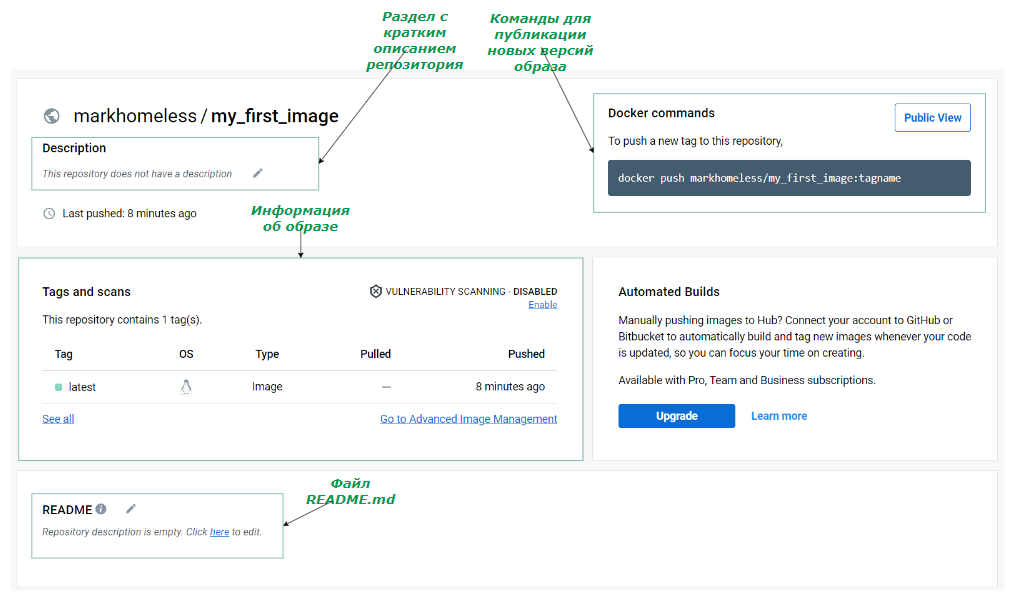

После того как образ выложен на Docker Hub, любой пользователь может скачать его и воспользоваться им. Для этого используется команда `docker pull`, в аргументах которой указывается имя репозитория на Docker Hub:

`docker pull <username>/my_first_image`

После этого образ контейнера станет доступным для запуска (это можно отследить с помощью команды `docker images`), и его можно запустить стандартной командой `run`:

`docker run -it --rm -v $PWD/src/output/:/usr/src/app/output  --name=my_first_container my_first_image`

Иногда нам может потребоваться задать **переменные среды**, которые используются для определения констант. Чтобы задать их, в Dockerfile существует инструкция `ENV` — благодаря ей значение будет доступно в контейнере во время его выполнения.

В Dockerfile нужно добавить:

`ENV <key> <value>`  
или  
`ENV <key>=<value> ...`  
Или, к примеру, при запуске контейнера:  
`docker run --env <key>=<value>`

Например, мы хотим, чтобы в нашем контейнере появилась переменная среды `NAME`, в которой будет указываться имя разработчика контейнера. К этой переменной среды можно будет обратиться из любой части контейнера. Тогда в Dockerfile необходимо добавить объявление такой переменной среды:

`ENV NAME="Skillfactory"`

Некоторые команды Docker:
* `docker build` — создать образ контейнера;
* `docker images` — посмотреть список доступных образов;
* `docker rmi` — удалить образ;
* `docker run` — запустить контейнер;
* `docker stop` — остановить контейнер;
* `docker rm` — удалить контейнер;
* `docker ps` — посмотреть список запущенных контейнеров;
* `docker login` - залогиниться в учётной записи Docker Hub;
* `docker push` - отправить образ на Docker Hub;
* `docker pull` - скачать образ с Docker Hub;
* `docker logs` — посмотреть логи;
* `docker kill` — экстренно завершить процесс.


# <center>Создаём образ веб-сервиса
**ШАГ 1. ЗАВОРАЧИВАЕМ FLASK-ПРИЛОЖЕНИЕ В КОНТЕЙНЕР**

Вынесем файлы с кодом сервера (`server.py` и папка `models`) и клиентским приложением (`client.py`) в папки app и test соответственно. Это нужно для удобства, чтобы не прописывать несколько команд `COPY` в `Dockerfile`.

```
web
  ├─app
     ├─models
           └─model.pkl
     └─server.py
  ├─test
     └─client.py
  └─Dockerfile
  └─requirements.txt
```

Момент, который необходимо иметь в виду: когда мы запускаем веб-сервис в контейнере, для тестирования сервера необходимо пользоваться широковещательным адресом (`0.0.0.0`) — это позволит вам обеспечить доступ к вашему контейнеру.

```py
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)
```

Теперь, когда у нас есть собранный контейнер, нам осталось лишь запустить его. Как мы знаем, это делается с помощью команды `docker run`. Единственное отличие от предыдущего контейнера: так как в нашем контейнере будет работать веб-приложение, нам необходимо открыть внешним приложениям доступ к порту, на котором запущено приложение. Это делается с помощью указания ключа `--publish` или его сокращённой версии `-p`. В аргументе этой команды указывается диапазон из номеров портов контейнера, которые мы хотим сделать публичными. В нашем приложении мы указали, что нам нужен порт `5000`, а значит, диапазон будет выглядеть как `5000:5000`. Общий синтаксис команды:

`docker run -it --rm --name=server_container -p=5000:5000 flask_image`

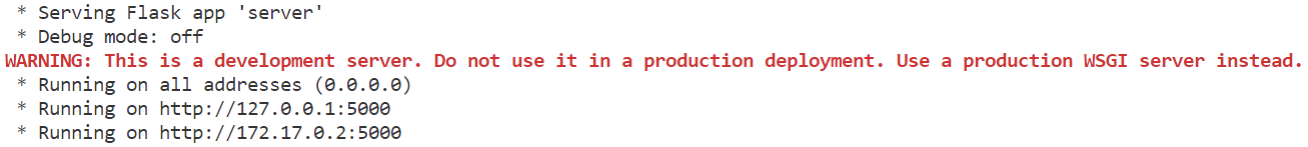

* Первый адрес — `localhost` (http://127.0.0.1:5000 или http://localhost:5000).

* Второй адрес — адрес контейнера. По нему контейнеры могут «общаться» друг с другом.

Кстати, можно запускать контейнер в фоновом режиме. Для этого добавьте к команде `docker run ключ -d` (от англ. detach — отделить):

`docker run -it --rm --name=flask_container -publish=5000:5000 flask_image`


**ШАГ 2. FLASK + UWSGI + NGINX + DOCKER**

К счастью, на Docker Hub выложены образы контейнеров, в которых уже настроена вся необходимая конфигурация uWSGI и NGINX. Всё, что от нас требуется — заменить файл конфигурации uWSGI, который лежит внутри контейнера, на тот, который нужен нам, а также поместить в контейнер исходный код с интерфейсом севера, который будет выполняться сервером uWSGI.

Базовый образ, который мы будем использовать для своего контейнера, — [tiangolo/uwsgi-nginx-flask](https://hub.docker.com/r/tiangolo/uwsgi-nginx-flask). 

Образ `tiangolo/uwsgi-nginx-flask` создан на базе ОС Linux, и в нём уже настроено взаимодействие серверов uWSGI и NGINX через сокеты.

В рабочей директории образа уже лежат файлы некоторого приложения. Давайте проверим, что образ работает — напишем Dockerfile, состоящий только из импорта базового образа (через ":" указывается версия Python, которую мы будем использовать):

`FROM tiangolo/uwsgi-nginx-flask:python3.9`

Соберём образ контейнера и назовём его `server_image`:

`docker build -t server_image .`

Затем запустим контейнер на порте 80 (HTTP):

`docker run -it --rm --name=server_container -p=80:80 server_image`

Проверим, что сервер работает. Для этого перейдём по адресу http://localhost или http://127.0.0.1. Обратите внимание, что номер порта указывать необязательно, так как мы запустили сервер на порте 80.

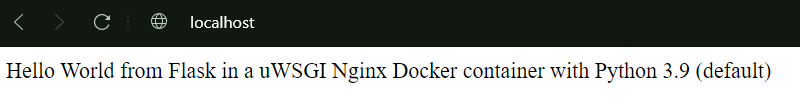

Итак, внутри этого образа уже работает какое-то Flask-приложение. Нам лишь нужно заменить его на своё.

Для начала давайте выясним, что представляет собой содержимое этого контейнера. Для этого, не останавливая работу контейнера, в соседнем терминале наберём следующую команду:

`docker exec -it server_container bash`

После её выполнения мы попадём в файловую систему, окажемся в рабочей директории нашего контейнера и сможем проанализировать его содержимое. Например, выполним команду `ls` (вывести содержимое той директории, в которой она была вызвана):

Чтобы посмотреть содержимое файлов, можно воспользоваться командой `cat`. Например, следующая команда позволит вывести содержимое файла `main.py`:

`cat main.py`

Что мы видим? Внутри контейнера есть:

* `main.py` — файл с кодом Flask-приложения;
* `uwsgi.ini` — файл с настройками uWSGI-сервера;
* `prestart.sh` — bash-скрипт для запуска;
* `__pycache__` — папка с кэшем.

Итак, сервер uWSGI в качестве своего интерфейса использует код из файла `main.py`. Наша задача — заменить файл `uwsgi.ini` на свой, где в качестве исполняемого приложения будет наш файл `server.py`.

Давайте создадим в корневом каталоге нашего проекта файл `uwsgi.ini`. В этом файле мы пропишем, что будем использовать объект `app` из модуля `server.py`, количество процессов, обрабатывающих поступающие на сервер запросы, а также добавим master-поток, который будет координировать работу потоков.

```
[uwsgi]
 
module = server:app
processes = 4
master = true
```

Остальные параметры uWSGI, такие как сокет для взаимодействия с NGINX, уже заданы в образе по умолчанию — изменять их не нужно.

В результате копирования файла `uwsgi.ini` из локальной директории в файловую систему контейнера мы перезаписали файл `uwsgi.ini`, который находился в контейнере, на свой вариант, и теперь сервер uWSGI будет работать по нашим правилам.

Теперь на сервере для обработки поступающих запросов вместо файла `main.py` используется файл `server.py`.

**ШАГ 3. ДЕЛАЕМ PUSH ВЕБ-СЕРВИСА НА DOCKER HUB**

Нам необходимо пересобрать образ, задав ему имя в формате `<username>/server_name`, где `<username>` — имя пользователя в профиле на Docker Hub.

`docker build -t <username>/server_image .`

Образ собран — осталось только загрузить его на Docker Hub:

`docker push <username>/server_image`

Чтобы сделать `pull` на другом компьютере:

`docker pull <username>/server_image`  
`docker run -it --rm --name=server_container -p=80:80 server_image`